# load the Census Income dataset

dataset = fetch_openml[name='adult', as_frame=True)
df, y = dataset.data, dataset.target


In [1]:
# setup lib model test out AutoML from flaml

from flaml import AutoML
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine(as_frame=True)
df = data.frame
#X = df
X = df.drop(columns=["target"])
#y = data.target
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

automl = AutoML()
automl.fit(
    X_train, y_train,
    task="classification", time_budget=120, metric="macro_f1",
    eval_method="cv", n_splits=3,
)
print("Best learner:", automl.best_estimator)
print("Best config:", automl.best_config)
y_pred=automl.predict(X_test)

[flaml.automl.logger: 10-21 20:11:59] {1752} INFO - task = classification
[flaml.automl.logger: 10-21 20:11:59] {1763} INFO - Evaluation method: cv
[flaml.automl.logger: 10-21 20:11:59] {1862} INFO - Minimizing error metric: 1-macro_f1
[flaml.automl.logger: 10-21 20:11:59] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 10-21 20:11:59] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-21 20:11:59] {2417} INFO - Estimated sufficient time budget=1724s. Estimated necessary time budget=40s.
[flaml.automl.logger: 10-21 20:11:59] {2466} INFO -  at 0.2s,	estimator lgbm's best error=0.1189,	best estimator lgbm's best error=0.1189
[flaml.automl.logger: 10-21 20:11:59] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-21 20:11:59] {2466} INFO -  at 0.4s,	estimator lgbm's best error=0.1189,	best estimator lgbm's best error=0.1189
[flaml.automl.logger: 10-21

In [40]:
# adult
# Install dependencies (uncomment if running in a new environment)
# !pip install flaml scikit-learn

from flaml import AutoML
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [41]:
# 1. Load the Adult dataset
X, y = fetch_openml(name="adult", version=2, as_frame=True, return_X_y=True)

In [25]:
import pandas as pd

ds = fetch_openml(name="adult", version=2, as_frame=True)
df, y = ds.data, ds.target;


In [74]:

pd.DataFrame({'Data Type': df.dtypes}).T

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
Data Type,int64,category,int64,category,int64,category,category,category,category,category,int64,int64,int64,category


In [75]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


some data are in wrong categories.  missing values based on the feature types.

In [21]:
pd.DataFrame({'% missing values': df.isnull().sum() *100/len(df)}).T

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
% missing values,0.0,5.730724,0.0,0.0,0.0,0.0,5.751198,0.0,0.0,0.0,0.0,0.0,0.0,1.754637


[Text(0, 0, '37155'), Text(0, 0, '11687')]

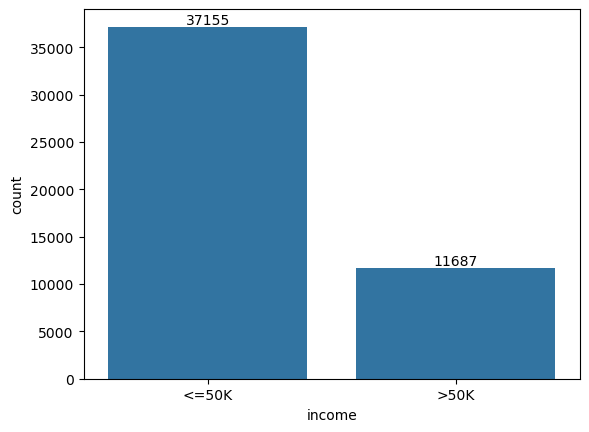

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt




y_df = pd.DataFrame(y)
y_df.columns = ['income']

ax=sns.countplot(x="income", data=y_df)
ax.bar_label(ax.containers[0])

In [42]:
# Convert the target column to binary values ('<=50K' -> 0, '>50K' -> 1)
y = (y == ">50K").astype(int)

# 2. Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39073, 14), (9769, 14), (39073,), (9769,))

In [50]:
# 3. Create and configure AutoML
import os, pathlib

LOG_PATH = pathlib.Path("adult_flaml.log").resolve()
print("Will write log to:", LOG_PATH)


automl = AutoML()

automl_settings = {
    "time_budget": 120,  # total running time in seconds
    "metric": "accuracy",
    "task": "classification",
    "log_file_name": str(LOG_PATH),
    "model_history": True,
    "keep_search_state": True,
    "verbose": 3,
}

# 4. Run AutoML
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

[flaml.automl.logger: 10-23 09:52:03] {1644} WARNING - With `model_history` set to `True` by default, all intermediate models are retained in memory, which may significantly increase memory usage and slow down training. Consider setting `model_history=False` to optimize memory and accelerate the training process.
[flaml.automl.logger: 10-23 09:52:03] {1752} INFO - task = classification
[flaml.automl.logger: 10-23 09:52:03] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-23 09:52:03] {1862} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 10-23 09:52:03] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 10-23 09:52:03] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-23 09:52:03] {2417} INFO - Estimated sufficient time budget=908s. Estimated necessary time budget=21s.
[flaml.automl.logger: 10-23 09:52:03] {2466} INFO -  at 0.2s,	estimato

In [51]:
state = getattr(automl, "_state", None)
print("has_state:", bool(state))
print("trial_results len:", len(getattr(state, "trial_results", []) or []))
print("model_history type:", type(getattr(state, "model_history", None)))


has_state: True
trial_results len: 0
model_history type: <class 'bool'>


In [37]:
# 5. Evaluate the best model
y_pred = automl.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best model: {automl.best_estimator}")
print(f"Best hyperparameters: {automl.best_config}")
print(f"Validation accuracy: {automl.best_loss}")
print(f"Test accuracy: {accuracy:.4f}")

Best model: xgb_limitdepth
Best hyperparameters: {'n_estimators': 131, 'max_depth': 4, 'min_child_weight': np.float64(3.2494153611140617), 'learning_rate': np.float64(0.23511987355535005), 'subsample': 1.0, 'colsample_bylevel': np.float64(0.7434035055937628), 'colsample_bytree': np.float64(0.7062896312160846), 'reg_alpha': 0.0009765625, 'reg_lambda': np.float64(0.50726946690613)}
Validation accuracy: 0.12276214833759591
Test accuracy: 0.8764


In [53]:
import os, pathlib

LOG_PATH = pathlib.Path("adult_flaml.log").resolve()
print("Will write log to:", LOG_PATH)

print("Log exists:", LOG_PATH.exists(), "size:", LOG_PATH.stat().st_size if LOG_PATH.exists() else 0)
# Show the last 40 lines so we can see the format
print("\n".join(LOG_PATH.read_text(encoding="utf-8", errors="ignore").splitlines()[-40:]))


Will write log to: C:\Users\ytian\second-repo\adult_flaml.log
Log exists: True size: 5401
{"record_id": 0, "iter_per_learner": 1, "logged_metric": {"pred_time": 2.5504690301997584e-06}, "trial_time": 0.08873176574707031, "wall_clock_time": 0.19447970390319824, "validation_loss": 0.2406649616368286, "config": {"n_estimators": 4, "num_leaves": 4, "min_child_samples": 20, "learning_rate": 0.09999999999999995, "log_max_bin": 8, "colsample_bytree": 1.0, "reg_alpha": 0.0009765625, "reg_lambda": 1.0}, "learner": "lgbm", "sample_size": 35165}
{"record_id": 1, "iter_per_learner": 2, "logged_metric": {"pred_time": 1.2744113307474825e-06}, "trial_time": 0.5016591548919678, "wall_clock_time": 1.0332388877868652, "validation_loss": 0.2232736572890025, "config": {"penalty": "l1", "alpha": 0.00048220009927335403, "l1_ratio": 0.00870574889667242, "epsilon": 0.1, "learning_rate": "constant", "eta0": 0.007328089893072002, "power_t": 0.47436097801285154, "average": false, "loss": "log_loss"}, "learner": 

In [55]:
print("\n".join(Path("adult_flaml.log").read_text(encoding="utf-8", errors="ignore").splitlines()[-40:]))


{"record_id": 0, "iter_per_learner": 1, "logged_metric": {"pred_time": 2.5504690301997584e-06}, "trial_time": 0.08873176574707031, "wall_clock_time": 0.19447970390319824, "validation_loss": 0.2406649616368286, "config": {"n_estimators": 4, "num_leaves": 4, "min_child_samples": 20, "learning_rate": 0.09999999999999995, "log_max_bin": 8, "colsample_bytree": 1.0, "reg_alpha": 0.0009765625, "reg_lambda": 1.0}, "learner": "lgbm", "sample_size": 35165}
{"record_id": 1, "iter_per_learner": 2, "logged_metric": {"pred_time": 1.2744113307474825e-06}, "trial_time": 0.5016591548919678, "wall_clock_time": 1.0332388877868652, "validation_loss": 0.2232736572890025, "config": {"penalty": "l1", "alpha": 0.00048220009927335403, "l1_ratio": 0.00870574889667242, "epsilon": 0.1, "learning_rate": "constant", "eta0": 0.007328089893072002, "power_t": 0.47436097801285154, "average": false, "loss": "log_loss"}, "learner": "sgd", "sample_size": 35165}
{"record_id": 2, "iter_per_learner": 3, "logged_metric": {"pr

# Algorithm selection

In [56]:
import json
import pandas as pd
from pathlib import Path

LOG_PATH = Path("adult_flaml.log")

rows = []
with LOG_PATH.open("r", encoding="utf-8", errors="ignore") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        try:
            rec = json.loads(line)
        except json.JSONDecodeError:
            continue  # skip non-JSON lines
        # pull fields if present
        learner = rec.get("learner")
        loss = rec.get("validation_loss") or rec.get("current_loss") or rec.get("loss")
        wc_time = rec.get("wall_clock_time")
        trial_time = rec.get("trial_time")
        if learner is not None and loss is not None:
            rows.append({
                "estimator": str(learner),
                "val_loss": float(loss),
                "wall_clock_time": wc_time,
                "trial_time": trial_time,
                "record_id": rec.get("record_id"),
                "iter_per_learner": rec.get("iter_per_learner"),
            })

df_trials = pd.DataFrame(rows).dropna(subset=["val_loss"])
df_trials["val_acc"] = 1.0 - df_trials["val_loss"]  # because metric="accuracy"
df_trials.head()


,estimator,val_loss,wall_clock_time,trial_time,record_id,iter_per_learner,val_acc
0,lgbm,0.240665,0.194480,0.088732,0,1,0.759335
1,sgd,0.223274,1.033239,0.501659,1,2,0.776726
2,lgbm,0.159847,1.124991,0.088762,2,3,0.840153
3,lgbm,0.138107,1.408234,0.174533,3,4,0.861893
4,lgbm,0.134015,1.710426,0.193478,4,6,0.865985


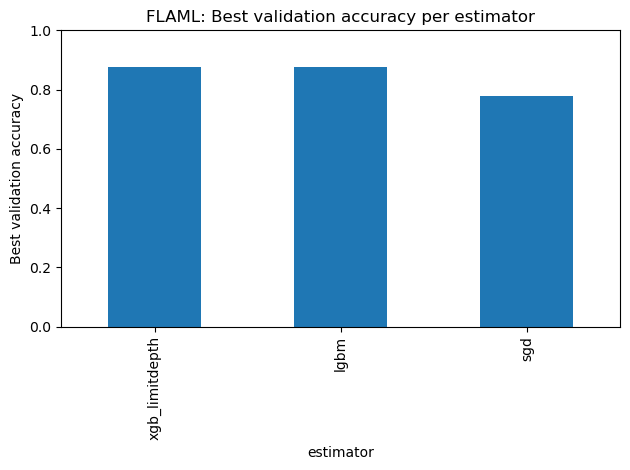

In [57]:
import matplotlib.pyplot as plt

best = (df_trials
        .groupby("estimator")["val_acc"]
        .max()
        .sort_values(ascending=False))

plt.figure()
best.plot(kind="bar")
plt.ylim(0, 1)
plt.ylabel("Best validation accuracy")
plt.title("FLAML: Best validation accuracy per estimator")
plt.tight_layout()
plt.show()


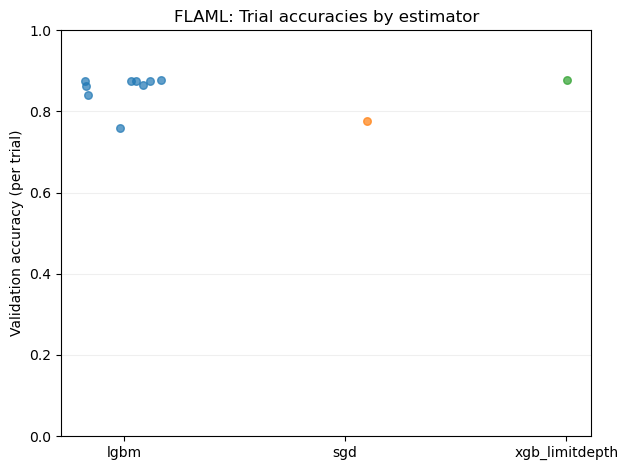

In [58]:
import numpy as np
plt.figure()
ests = list(df_trials["estimator"].unique())
for i, est in enumerate(ests):
    vals = df_trials.loc[df_trials["estimator"] == est, "val_acc"].to_numpy()
    x = np.full_like(vals, i, dtype=float) + (np.random.rand(len(vals)) - 0.5) * 0.35
    plt.scatter(x, vals, s=30, alpha=0.7)
plt.xticks(range(len(ests)), ests)
plt.ylim(0, 1)
plt.ylabel("Validation accuracy (per trial)")
plt.title("FLAML: Trial accuracies by estimator")
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()


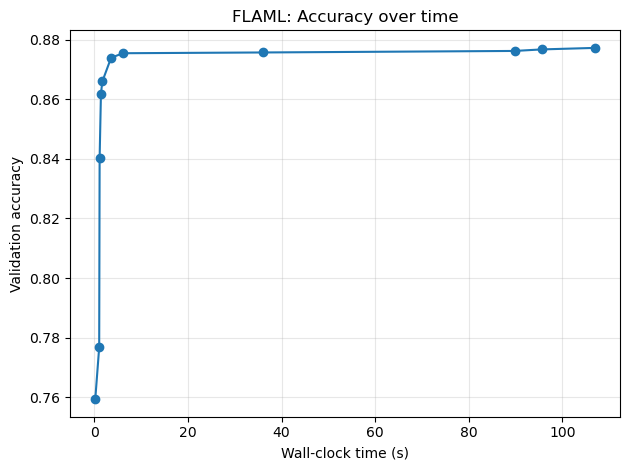

In [59]:
# keep only rows with wall_clock_time
progress = df_trials.dropna(subset=["wall_clock_time"]).copy()
progress.sort_values("wall_clock_time", inplace=True)

plt.figure()
plt.plot(progress["wall_clock_time"], progress["val_acc"], marker="o", linestyle="-")
plt.xlabel("Wall-clock time (s)")
plt.ylabel("Validation accuracy")
plt.title("FLAML: Accuracy over time")
plt.grid(True, axis="both", alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\ytian\AppData\Local\Temp\ipykernel_33240\1959791424.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=ests, showfliers=False)


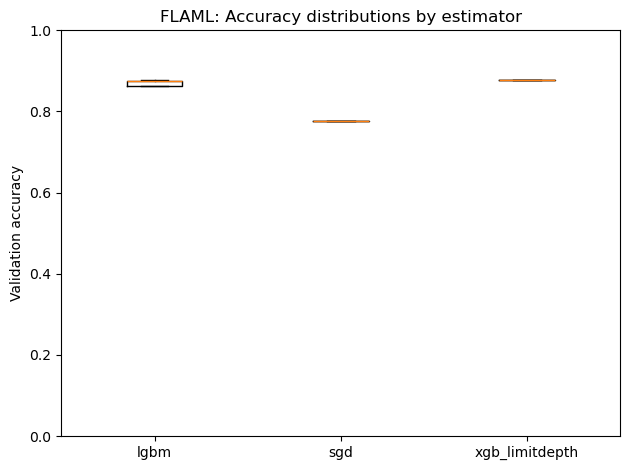

In [60]:
plt.figure()
data = [df_trials.loc[df_trials["estimator"] == est, "val_acc"].to_numpy() for est in ests]
plt.boxplot(data, labels=ests, showfliers=False)
plt.ylim(0, 1)
plt.ylabel("Validation accuracy")
plt.title("FLAML: Accuracy distributions by estimator")
plt.tight_layout()
plt.show()


Text(50.722222222222214, 0.5, 'Actual')

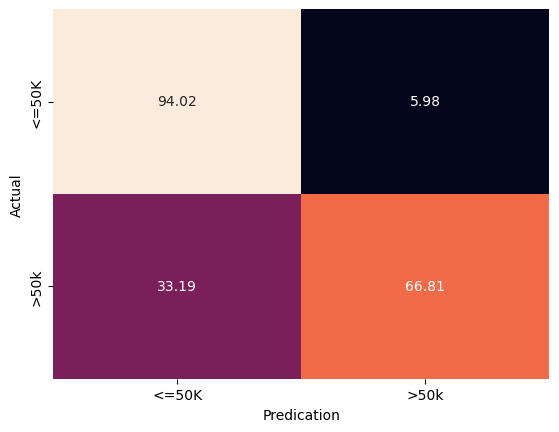

In [63]:
from sklearn.metrics import roc_auc_score, confusion_matrix, make_scorer, f1_score
# Confusion matrix
y_pred = automl.predict(X_test)
cm = confusion_matrix(y_test.astype(int), y_pred, labels=[False, True])
cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(cm)
df_cm = df_cm * 100

ax = sns.heatmap(df_cm, annot=True, fmt='.2f', cbar=False,
                xticklabels=['<=50K','>50k'], yticklabels=['<=50K', '>50k'])
ax.set_xlabel('Predication')
ax.set_ylabel('Actual')


In [64]:
# Parse your NDJSON FLAML log (you already shared this format)
import json, pandas as pd
from pathlib import Path

rows = []
with Path("adult_flaml.log").open("r", encoding="utf-8", errors="ignore") as f:
    for line in f:
        line = line.strip()
        if not line: continue
        try:
            rec = json.loads(line)
        except json.JSONDecodeError:
            continue
        learner = rec.get("learner")
        loss = rec.get("validation_loss") or rec.get("current_loss") or rec.get("loss")
        ss = rec.get("sample_size")   # <-- sampling info, if present
        wc = rec.get("wall_clock_time")
        if learner is not None and loss is not None and ss is not None:
            rows.append({"estimator": learner, "val_loss": float(loss),
                         "val_acc": 1.0 - float(loss), "sample_size": int(ss),
                         "wall_clock_time": wc})
df_trials = pd.DataFrame(rows)


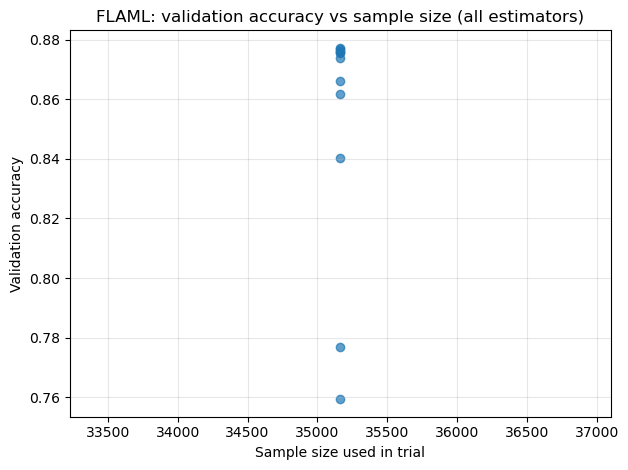

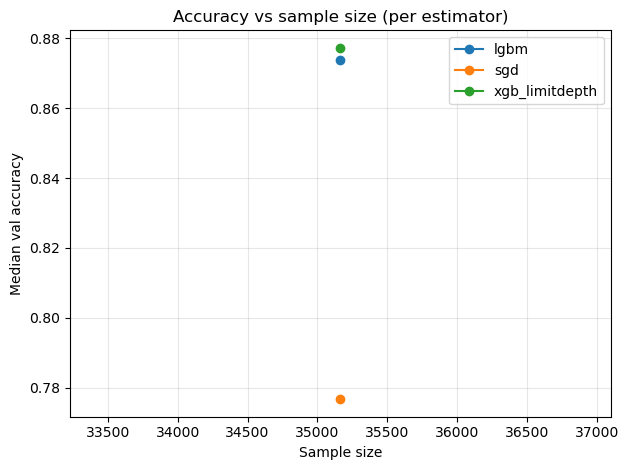

In [65]:
import matplotlib.pyplot as plt

# Overall scatter
df_s = df_trials.sort_values("sample_size")
plt.figure()
plt.scatter(df_s["sample_size"], df_s["val_acc"], alpha=0.7)
plt.xlabel("Sample size used in trial"); plt.ylabel("Validation accuracy")
plt.title("FLAML: validation accuracy vs sample size (all estimators)")
plt.grid(True, axis="both", alpha=0.3); plt.tight_layout(); plt.show()

# Per-learner curves (median smoothing)
for est, sub in df_trials.groupby("estimator"):
    sub = sub.sort_values("sample_size")
    gb = sub.groupby("sample_size")["val_acc"].median()
    plt.plot(gb.index, gb.values, marker="o", label=est)
plt.xlabel("Sample size"); plt.ylabel("Median val accuracy")
plt.title("Accuracy vs sample size (per estimator)")
plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()


# Sampling selection


[flaml.automl.logger: 10-23 14:48:02] {1752} INFO - task = classification
[flaml.automl.logger: 10-23 14:48:02] {1763} INFO - Evaluation method: cv
[flaml.automl.logger: 10-23 14:48:02] {1862} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 10-23 14:48:02] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 10-23 14:48:02] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-23 14:48:02] {2417} INFO - Estimated sufficient time budget=3263s. Estimated necessary time budget=76s.
[flaml.automl.logger: 10-23 14:48:02] {2466} INFO -  at 0.4s,	estimator lgbm's best error=0.2406,	best estimator lgbm's best error=0.2406
[flaml.automl.logger: 10-23 14:48:02] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-23 14:48:03] {2466} INFO -  at 0.7s,	estimator lgbm's best error=0.2406,	best estimator lgbm's best error=0.2406
[flaml.automl.logger: 10-23

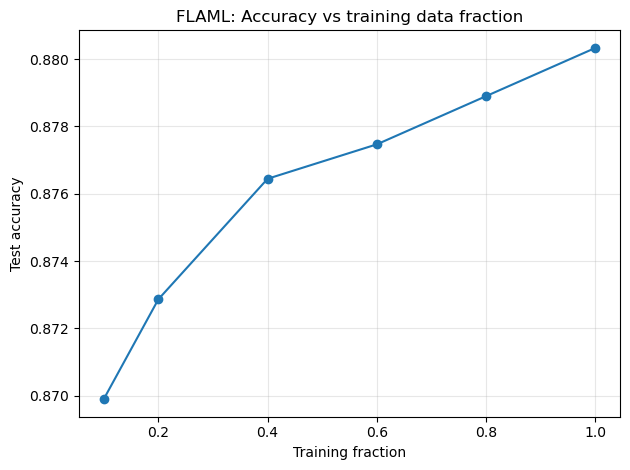

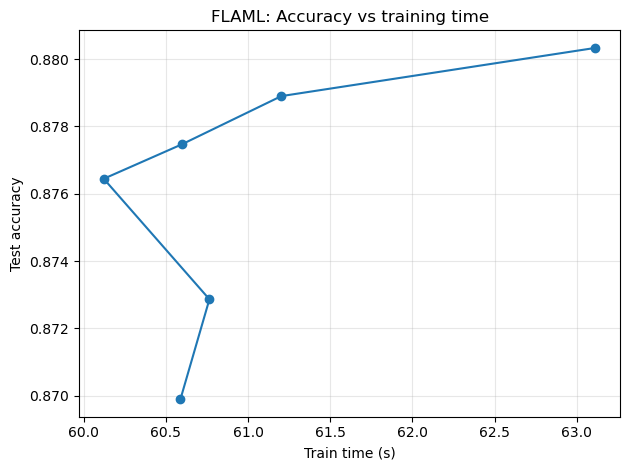

In [76]:
from flaml import AutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np, time, pandas as pd
import matplotlib.pyplot as plt

def run_at_fraction(X_train, y_train, X_test, y_test, frac, time_budget=60, seed=42):
    """Train FLAML on a subset fraction of the train set and evaluate on the fixed test set."""
    if not (0.0 < frac <= 1.0):
        raise ValueError("frac must be in (0, 1].")

    # 1) Build the subset
    if frac >= 0.999999:  # use full train set
        X_sub, y_sub = X_train, y_train
    else:
        # try stratified; if it fails (rare with tiny fracs), fall back to non-stratified
        try:
            X_sub, _, y_sub, _ = train_test_split(
                X_train, y_train,
                train_size=frac,
                stratify=y_train,
                random_state=seed,
            )
        except ValueError:
            X_sub, _, y_sub, _ = train_test_split(
                X_train, y_train,
                train_size=frac,
                stratify=None,
                random_state=seed,
            )

    # 2) Fit FLAML
    automl = AutoML()
    t0 = time.time()
    automl.fit(
        X_train=X_sub, y_train=y_sub,
        time_budget=time_budget,          # keep constant or scale by frac if you prefer
        task="classification", metric="accuracy",
        log_file_name=f"flaml_frac_{frac:.2f}.log",
        # model_history=True, keep_search_state=True  # optional
    )
    train_time = time.time() - t0

    # 3) Evaluate on the same held-out test set
    y_pred = automl.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    return {
        "frac": frac,
        "n_train": len(y_sub),
        "train_time": train_time,
        "test_acc": acc,
        "best_estimator": automl.best_estimator,
    }

# ---- Run the experiment across fractions ----
fractions = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
rows = [run_at_fraction(X_train, y_train, X_test, y_test, f, time_budget=60) for f in fractions]
df_curve = pd.DataFrame(rows)
print(df_curve)

# ---- Plot accuracy vs training fraction ----
plt.figure()
plt.plot(df_curve["frac"], df_curve["test_acc"], marker="o")
plt.xlabel("Training fraction")
plt.ylabel("Test accuracy")
plt.title("FLAML: Accuracy vs training data fraction")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ---- Plot accuracy vs training time ----
plt.figure()
plt.plot(df_curve["train_time"], df_curve["test_acc"], marker="o")
plt.xlabel("Train time (s)")
plt.ylabel("Test accuracy")
plt.title("FLAML: Accuracy vs training time")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_curve["frac"], df_curve["test_acc"], marker="o")
plt.xlabel("Training fraction"); plt.ylabel("Test accuracy")
plt.title("Accuracy vs training data fraction")
plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

plt.figure()
plt.plot(df_curve["train_time"], df_curve["test_acc"], marker="o")
plt.xlabel("Train time (s)"); plt.ylabel("Test accuracy")
plt.title("Accuracy vs train time")
plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()


In [69]:
# 0) Make sure columns align EXACTLY like training
X_test_aligned = X_test[X_train.columns].copy()

print("Shapes:",
      "\n  X_train:", X_train.shape,
      "\n  X_test_aligned:", X_test_aligned.shape,
      "\n  y_test:", getattr(y_test, "shape", type(y_test)))

print("First 5 feature names:", list(X_train.columns[:5]))

# y_test must be 1D
import numpy as np
y_test_1d = y_test.squeeze() if hasattr(y_test, "squeeze") else np.asarray(y_test).squeeze()
print("y_test_1d shape:", np.asarray(y_test_1d).shape)


Shapes: 
  X_train: (39073, 14) 
  X_test_aligned: (9769, 14) 
  y_test: (9769,)
First 5 feature names: ['age', 'workclass', 'fnlwgt', 'education', 'education-num']
y_test_1d shape: (9769,)


# Feature Selection


In [70]:
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure identical order + use NumPy to avoid XGBoost's name checks
X_test_aligned = X_test[X_train.columns].copy()
Xi = X_test_aligned.to_numpy()
yi = np.asarray(y_test).squeeze()

# Baseline check
base_acc = automl.model.score(Xi, yi)
print("Baseline accuracy (model.score):", base_acc)

# Permutation importance (accuracy)
res = permutation_importance(
    automl.model, Xi, yi,
    scoring="accuracy", n_repeats=5, random_state=42, n_jobs=-1
)

print("importances_mean shape:", res.importances_mean.shape)
print("First 5 importances:", res.importances_mean[:5])

imp = pd.DataFrame({
    "feature": X_train.columns,
    "importance": res.importances_mean,
    "std": res.importances_std,
}).sort_values("importance", ascending=False).reset_index(drop=True)

print("Non-NaN importances:", imp["importance"].notna().sum(), "/", len(imp))
print(imp.head(10))


Baseline accuracy (model.score): 0.7655850138192241
importances_mean shape: (14,)
First 5 importances: [0. 0. 0. 0. 0.]
Non-NaN importances: 14 / 14
          feature  importance  std
0             age         0.0  0.0
1       workclass         0.0  0.0
2          fnlwgt         0.0  0.0
3       education         0.0  0.0
4   education-num         0.0  0.0
5  marital-status         0.0  0.0
6      occupation         0.0  0.0
7    relationship         0.0  0.0
8            race         0.0  0.0
9             sex         0.0  0.0


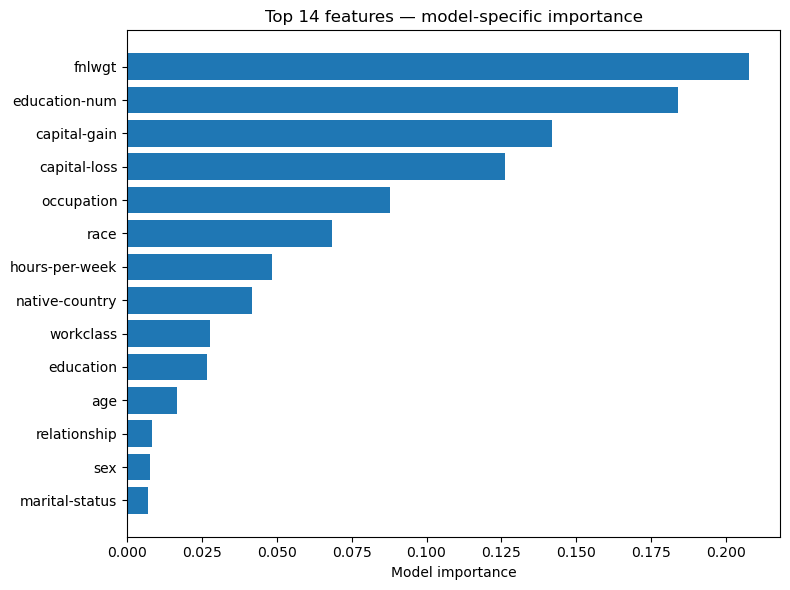

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model = automl.model
names = list(X_train.columns)

imp_df = None

# LightGBM-style
fi = getattr(model, "feature_importances_", None)
if fi is not None:
    imp_df = pd.DataFrame({"feature": names, "importance": np.asarray(fi, dtype=float)})

# XGBoost-style
if imp_df is None:
    try:
        booster = model.get_booster()
        scores = booster.get_score(importance_type="gain")  # "gain" | "weight" | "cover"
        arr = np.array([scores.get(n, 0.0) for n in names], dtype=float)
        imp_df = pd.DataFrame({"feature": names, "importance": arr})
    except Exception:
        pass

# Generic sklearn (e.g., linear, RF)
if imp_df is None:
    fi = getattr(model, "feature_importances_", None)
    if fi is not None:
        imp_df = pd.DataFrame({"feature": names, "importance": np.asarray(fi, dtype=float)})
    else:
        coef = getattr(model, "coef_", None)
        if coef is not None:
            coef = np.asarray(coef).ravel()
            imp_df = pd.DataFrame({"feature": names, "importance": np.abs(coef)})

if imp_df is None:
    raise RuntimeError("Couldn't extract model-specific importances. Tell me automl.best_estimator and type(automl.model).")

imp_df = imp_df.sort_values("importance", ascending=False).reset_index(drop=True)
TOP = min(20, len(imp_df))
top = imp_df.head(TOP).iloc[::-1]

plt.figure(figsize=(8,6))
plt.barh(top["feature"], top["importance"])
plt.xlabel("Model importance")
plt.title(f"Top {TOP} features — model-specific importance")
plt.tight_layout()
plt.show()


Kept (0): []
Dropped (14): ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


C:\Users\ytian\AppData\Local\Temp\ipykernel_33240\2896232374.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


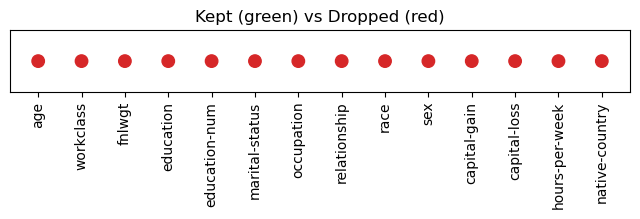

In [72]:
# Use permutation if you have it; else fall back to model importance
source = imp if "imp" in locals() and imp["importance"].notna().any() else imp_df.copy()

# Rule A: drop <= 0 (for permutation)
if source is imp:
    kept = source.loc[source["importance"] > 0, "feature"].tolist()
    dropped = source.loc[source["importance"] <= 0, "feature"].tolist()
# Rule B: bottom 20% by model importance
else:
    thr = source["importance"].quantile(0.2)
    kept = source.loc[source["importance"] > thr, "feature"].tolist()
    dropped = source.loc[source["importance"] <= thr, "feature"].tolist()

print(f"Kept ({len(kept)}):", kept)
print(f"Dropped ({len(dropped)}):", dropped)

# Quick visual strip
all_feats = source["feature"].tolist()
is_kept = [f in kept for f in all_feats]
colors = ["#2ca02c" if k else "#d62728" for k in is_kept]

plt.figure(figsize=(8,0.8))
plt.scatter(range(len(all_feats)), [0]*len(all_feats), c=colors, s=80)
plt.yticks([])
plt.xticks(range(len(all_feats)), all_feats, rotation=90)
plt.title("Kept (green) vs Dropped (red)")
plt.tight_layout()
plt.show()


In [77]:
# Specify algorithms, Sample size, features, score metrics

In [ ]:
# specify algorithm model

In [78]:
from flaml import AutoML
from sklearn.metrics import roc_auc_score

# 1️⃣ Configure AutoML to use only Logistic Regression
automl_lr = AutoML()

automl_lr_settings = {
    "task": "classification",
    "time_budget": 60,  # seconds
    "estimator_list": ["lrl1"],  # only logistic regression
    "metric": "roc_auc",
    "log_file_name": "flaml_lr_log.log"
}

# 2️⃣ Train Logistic Regression using FLAML pipeline
automl_lr.fit(X_train=X_train, y_train=y_train, **automl_lr_settings)

# 3️⃣ Predict probabilities and compute ROC AUC
y_proba = automl_lr.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, y_proba)

print(f"✅ ROC AUC Score on test data (Logistic Regression): {roc:.4f}")


[flaml.automl.logger: 10-23 14:58:27] {1752} INFO - task = classification
[flaml.automl.logger: 10-23 14:58:27] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-23 14:58:27] {1862} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 10-23 14:58:27] {1979} INFO - List of ML learners in AutoML Run: ['lrl1']
[flaml.automl.logger: 10-23 14:58:27] {2282} INFO - iteration 0, current learner lrl1
[flaml.automl.logger: 10-23 14:58:28] {2417} INFO - Estimated sufficient time budget=11305s. Estimated necessary time budget=11s.
[flaml.automl.logger: 10-23 14:58:28] {2466} INFO -  at 1.2s,	estimator lrl1's best error=0.3923,	best estimator lrl1's best error=0.3923
[flaml.automl.logger: 10-23 14:58:28] {2282} INFO - iteration 1, current learner lrl1
[flaml.automl.logger: 10-23 14:58:30] {2466} INFO -  at 2.9s,	estimator lrl1's best error=0.3923,	best estimator lrl1's best error=0.3923
[flaml.automl.logger: 10-23 14:58:30] {2282} INFO - iteration 2, current learner lrl1


In [80]:
from flaml import AutoML
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# 1️⃣ Load dataset
X, y = fetch_openml(name="adult", version=2, as_frame=True, parser="pandas", return_X_y=True)

# Split train, validation, and test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# 2️⃣ Configure AutoML
automl = AutoML()
automl_settings = {
    "time_budget": 30,           # seconds
    "metric": "roc_auc",         # optimize for ROC AUC
    "task": "classification",
    "estimator_list": ["lrl1", "lgbm", "rf", "xgboost"],  # which models to try
    "eval_method": "holdout",    # use holdout validation
    "log_file_name": "flaml_custom_val.log",
}

# 3️⃣ Train AutoML using explicit validation set
automl.fit(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,                 # 👈 pass validation features
    y_val=y_val,                 # 👈 pass validation labels
    **automl_settings
)

# 4️⃣ Evaluate on test set
y_proba = automl.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, y_proba)

print(f"✅ ROC AUC Score on test data: {roc:.4f}")
print(f"🏆 Best model: {automl.best_estimator}")
print(f"📉 Best validation loss: {automl.best_loss:.4f}")


[flaml.automl.logger: 10-23 15:05:04] {1752} INFO - task = classification
[flaml.automl.logger: 10-23 15:05:04] {1760} INFO - Data split method: stratified
[flaml.automl.logger: 10-23 15:05:04] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-23 15:05:04] {1862} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 10-23 15:05:04] {1979} INFO - List of ML learners in AutoML Run: ['lrl1', 'lgbm', 'rf', 'xgboost']
[flaml.automl.logger: 10-23 15:05:04] {2282} INFO - iteration 0, current learner lrl1
[flaml.automl.logger: 10-23 15:05:05] {2417} INFO - Estimated sufficient time budget=10608s. Estimated necessary time budget=11s.
[flaml.automl.logger: 10-23 15:05:05] {2466} INFO -  at 1.1s,	estimator lrl1's best error=0.3992,	best estimator lrl1's best error=0.3992
[flaml.automl.logger: 10-23 15:05:05] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-23 15:05:05] {2466} INFO -  at 1.2s,	estimator lgbm's best error=0.1390,	best estimator lgbm

In [ ]:
from flaml import AutoML
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# 1️⃣ Load dataset
X, y = fetch_openml(name="adult", version=2, as_frame=True, parser="pandas", return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2️⃣ Configure AutoML to tune several valid learners
automl = AutoML()
automl_settings = {
    "time_budget": 60,                # seconds
    "metric": "roc_auc",              # optimize for ROC AUC
    "task": "classification",
    "estimator_list": ["lrl1", "rf", "extra_tree"],  # ✅ valid built-ins
    "log_file_name": "flaml_multi_model_tune.log",
    "eval_method": "holdout",
}

# 3️⃣ Fit AutoML
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

# 4️⃣ Evaluate on test data
y_proba = automl.predict_proba(X_test)[:, 1]
score_modellist = roc_auc_score(y_test, y_proba)

print(f"✅ ROC-AUC Score on test data: {score_modellist:.4f}")
print(f"🏆 Best model found: {automl.best_estimator}")
print(f"📉 Best validation loss: {automl.best_loss:.4f}")


In [ ]:
from flaml import AutoML
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Example dataset (Adult income)
X, y = fetch_openml(name="adult", version=2, as_frame=True, parser="pandas", return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AutoML
automl = AutoML()

# ⚙️ Configure AutoML
automl_settings = {
    "time_budget": 60,              # seconds
    "metric": "accuracy",           # 👈 specify scoring metric here
    "task": "classification",
    "estimator_list": ["lrl1"],     # logistic regression
    "log_file_name": "flaml_acc.log",
    "eval_method": "holdout"
}

# Train
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

# Predict probabilities and compute ROC-AUC for evaluation
y_proba = automl.predict_proba(X_test)[:, 1]
score_scoringstr = roc_auc_score(y_test, y_proba)

print(f"✅ AUC ROC Score on test data: {score_scoringstr:.4f}")
print(f"🏆 Best estimator: {automl.best_estimator}")


In [ ]:
from flaml import AutoML
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score

# 1️⃣ Load data
X, y = fetch_openml(name="adult", version=2, as_frame=True, parser="pandas", return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2️⃣ Define custom FLAML-compatible metric
def f1_macro_metric(X_val, y_val, estimator, labels, X_train, y_train, 
                    weight_val=None, weight_train=None, config=None,
                    groups_val=None, groups_train=None):
    y_pred = estimator.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    return 1 - score, {"f1_macro": score}  # FLAML minimizes loss, so 1 - score

# 3️⃣ Configure AutoML
automl = AutoML()

automl_settings = {
    "time_budget": 60,
    "task": "classification",
    "metric": f1_macro_metric,         # 👈 custom FLAML-style metric
    "estimator_list": ["lrl1"],        # logistic regression
    "log_file_name": "flaml_f1macro.log",
    "eval_method": "holdout",
}

# 4️⃣ Fit AutoML
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

# 5️⃣ Evaluate on test data
y_proba = automl.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, y_proba)

print(f"✅ ROC-AUC on test set: {roc:.4f}")
print(f"🏆 Best estimator: {automl.best_estimator}")


In [ ]:
from flaml import AutoML
from sklearn.metrics import roc_auc_score

# 1️⃣ Create AutoML instance
automl = AutoML()

# 2️⃣ Train with a 10-second time budget
automl.fit(
    X_train=X_train,
    y_train=y_train,
    task="classification",
    metric="roc_auc",
    time_budget=10  # ⏱ stop after 10 seconds
)

# 3️⃣ Predict probabilities
y_proba = automl.predict_proba(X_test)[:, 1]

# 4️⃣ Compute ROC-AUC
score_timebudget = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score on test data: {score_timebudget:.4f}")
print(f"Best model: {automl.best_estimator}")


In [ ]:
from flaml import AutoML
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_openml
import pandas as pd

# ----------------------------------------------------------
# 1️⃣ Load and inspect Adult dataset
# ----------------------------------------------------------
adult = fetch_openml("adult", version=2, as_frame=True)
df = adult.frame

# Clean up column names
df.columns = [c.strip().replace("-", "_") for c in df.columns]
print(f"Columns in dataset: {df.columns.tolist()}")

# Detect target column name
target_col = "income" if "income" in df.columns else "class"
print(f"✅ Target column detected: {target_col}")

# Encode target
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])

# Define X and y
X = df.drop(target_col, axis=1)
y = df[target_col]

# ----------------------------------------------------------
# 2️⃣ Train/test split
# ----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------------------------------------
# 3️⃣ Select minimal subset of features safely
# ----------------------------------------------------------
desired_features = ["fnlwgt", "native_country"]

# Match available column names (handles underscores, etc.)
available_features = []
for feat in desired_features:
    matches = [c for c in X_train.columns if feat in c]
    available_features.extend(matches)

print(f"✅ Using {len(available_features)} available features: {available_features}")

X_train_min = X_train[available_features]
X_test_min = X_test[available_features]

# ----------------------------------------------------------
# 4️⃣ Train AutoML
# ----------------------------------------------------------
automl = AutoML()

automl.fit(
    X_train=X_train_min,
    y_train=y_train,
    task="classification",
    metric="roc_auc",
    time_budget=30,  # seconds
    estimator_list=["lgbm", "rf", "xgboost"],
    verbose=1,
)

# ----------------------------------------------------------
# 5️⃣ Evaluate ROC AUC
# ----------------------------------------------------------
y_pred_proba = automl.predict_proba(X_test_min)[:, 1]
score = roc_auc_score(y_test, y_pred_proba)

print("\n🎯 Best estimator:", automl.best_estimator)
print("🏁 Best config:", automl.best_config)
print(f"✅ ROC-AUC on test data: {score:.4f}")

# ----------------------------------------------------------
# 6️⃣ Show selected features (if supported)
# ----------------------------------------------------------
if hasattr(automl, "selected_features_names_"):
    print(f"\nSelected features ({len(automl.selected_features_names_)}):")
    print(automl.selected_features_names_)
else:
    print("\nFeature selection was not performed automatically.")
